# Patterns over Time
### Before we can begin to look at potential patterns over time, we need to help pandas understand that data in a given column is, in fact, date or time data. <u><font color=red>When a CSV file is imported into pandas, date and time data are typically interpreted as strings</font></u>, as we see here.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
divorce = pd.read_csv('divorce_one.csv')
divorce.dtypes

num_kids             float64
day                    int64
month                  int64
year                   int64
marriage_date         object
marriage_duration      int64
dtype: object

### We can fix that by adding the <u><font color=red>parse_dates keyword</font></u> argument to the CSV import and setting it equal to a list of column names that should be interpreted as DateTime data. Now, when we check the data types of the imported CSV, the indicated column is a DateTime object. This data type opens up many possibilities for analysis, such as looking at patterns over years, months, or even days of the week.


In [2]:
divorce = pd.read_csv('divorce_one.csv',parse_dates=["marriage_date"])
divorce.dtypes

num_kids                    float64
day                           int64
month                         int64
year                          int64
marriage_date        datetime64[ns]
marriage_duration             int64
dtype: object

### Of course, we may wish to update data types <u><font color=red>to DateTime data after we import the data. This is possible with pd.to_datetime</font></u>, which converts the argument passed to it to DateTime data. Here, we pass the marriage_date column with values stored as strings to pd.to_datetime. This returns DateTime data which we save as the new marriage_date column.


In [3]:
divorce[["day","month","year","marriage_duration"]].head(2)

,day,month,year,marriage_duration
0,26,6,2000,5
1,2,9,2001,7


In [4]:
divorce["marriage_date"] = pd.to_datetime(divorce[["day","month","year"]])
divorce.head(2)

,num_kids,day,month,year,marriage_date,marriage_duration
0,1.0,26,6,2000,2000-06-26,5
1,NaN,2,9,2001,2001-09-02,7


# Creating DateTime Data
### pd.to_datetime has lots of other useful functionality. For example, <u><font color=red>if a DataFrame has month, day, and year data stored in three different columns, as this one does, we can combine these columns into a single DateTime value</font></u> by passing them to pd.to_datetime. <u><font color=blue>Note that for this trick to work, columns must be named "month", "day", and "year", but can appear in any order in the DataFrame</font></u>.


In [5]:
divorce = pd.read_csv('divorce_one.csv')
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce.dtypes

num_kids                    float64
day                           int64
month                         int64
year                          int64
marriage_date        datetime64[ns]
marriage_duration             int64
dtype: object

### Conversely, we might want to <u><font color=red>extract just the month, day, or year from a column containing a full date</font></u>. If data is already stored in DateTime format, as marriage_date is, we can append .dt.month to extract the month attribute, for example. We'll save the month data as a new column in the DataFrame so that we can use it in our analysis.
#### Extract parts of full data using. dt.month dt.day and dt.year attributes 

In [6]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce.head()

,num_kids,day,month,year,marriage_date,marriage_duration,marriage_month
0,1.0,26,6,2000,2000-06-26,5,6
1,NaN,2,9,2001,2001-09-02,7,9
2,2.0,2,2,2000,2000-02-02,2,2
3,NaN,13,5,2006,2006-05-13,2,5
4,NaN,6,8,2007,2007-08-06,3,8


# Visualizing DateTime Data
### <u><font color=red>Line plots are a great way to examine relationships between variables</font><u>. In Seaborn, line plots aggregate y values at each value of x and show the estimated mean and a confidence interval for that estimate. Perhaps we'd like to check whether there is any relationship between the month that a now-divorced couple got married and the length of their marriage. We can set x equal to the marriage_month column and y equal to marriage_duration. 

### The results show some variation in mean marriage duration between months. The blue line represents the mean marriage duration for our dataset, while the confidence intervals in the <u><font color=red>lighter blue shading indicate the area that, with 95% probability, the population mean duration could fall between</font>. <font color=blue>The wide confidence intervals suggest that further analysis is needed!</font></u>


<Axes: xlabel='marriage_month', ylabel='marriage_duration'>

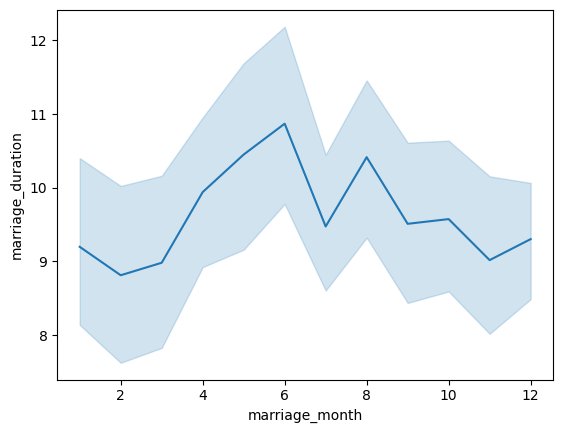

In [7]:
import seaborn as sns
sns.lineplot(data=divorce , x="marriage_month", y="marriage_duration")

<hr>

<div class="alert alert-block alert-info">
<h1>Let’s Practice</h1>
<h2>Page 8</h2>
<H4>
You'll now work with the entire divorce dataset! The data describes Mexican marriages dissolved between 2000 and 2015. It contains marriage and divorce dates, education level, birthday, income for each partner, and marriage duration, as well as the number of children the couple had at the time of divorce.
</H4>
</div>


<div class="alert alert-block alert-info">
<H4>
1. Import divorce.csv, saving as a DataFrame, divorce; indicate in the import function that the divorce_date, dob_man, and dob_woman, columns should be imported as DateTime values. Check the data types. 
</H4>
</div>

In [8]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv('divorce.csv', parse_dates=['divorce_date','dob_man','dob_woman'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date                object
marriage_duration           float64
num_kids                    float64
dtype: object


### Question 
####  Which of the columns in the divorce DataFrame has not been updated to a DateTime data type but should be? 
- divorce_date
- marriage_date.
- education_woman
- num_kids

<div class="alert alert-block alert-info">
<H4>
2. Convert the marriage_date column of the divorce DataFrame to DateTime values. Check the data types.
</H4>
<H4>Define a column called marriage_year, which contains just the year portion of the marriage_date column.</h4>
<H4>Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.</H4>
</div>

In [9]:
# Convert the marriage_date column to DateTime values
divorce["marriage_date"] = pd.to_datetime(divorce['marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


<div class="alert alert-block alert-info">
<H4>Define a column called marriage_year, which contains just the year portion of the marriage_date column.</h4>
</div>

In [10]:
# Define the marriage_year column
divorce["marriage_year"] = divorce["marriage_date"].dt.year

<div class="alert alert-block alert-info">
<H4>Create a line plot showing the average number of kids a couple had during their marriage, arranged by the year that the couple got married.</H4>
</div>

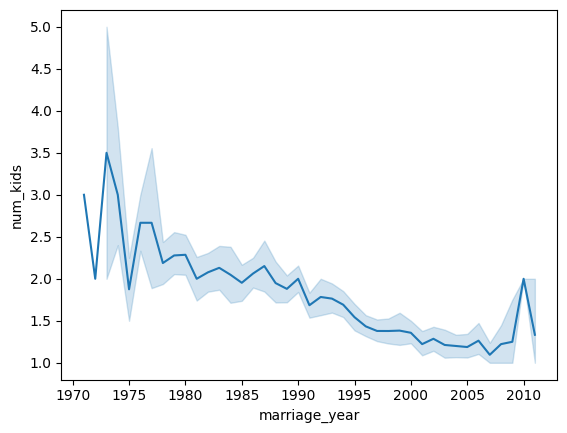

In [11]:
# Create a line plot showing the average number of kids by year
sns.lineplot(data=divorce, x='marriage_year', y='num_kids')
plt.show()

In [12]:
print(divorce['divorce_date'].min())
print(divorce['divorce_date'].max())

2000-01-08 00:00:00
2015-11-03 00:00:00


# Correlation 
#### Correlation describes the direction of the relationship between two variables as well as its strength. Understanding this relationship can help us use variables to predict future outcomes. A quick way to see the pairwise correlation of numeric columns in a DataFrame is to use pandas' .corr() method.
- A negative correlation coefficient indicates that as one variable increases, the other decreases. 
- A value closer to zero is indicative of a weak relationship, 
- Values closer to one or negative indicate stronger relationships. 
#### The number varies from -1 to 1. For example,
- 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.
- 0.9 is also a good relationship; if you increase one value, the other will probably increase.
- -0.9 would be just as good a relationship as 0.9, but if you increase one value, the other will drop.
- 0.2 means NOT a good relationship, meaning that if one value goes up does not mean the other will.
#### Note that .corr() calculates the Pearson correlation coefficient, measuring the linear relationship between two variables.


### Correlation
- Describe direction and strength of relation between two variables
- Can help us use variables to predicts future outcomes

In [13]:
divorce.corr(numeric_only = True)

,income_man,income_woman,marriage_duration,num_kids,marriage_year
income_man,1.000000,0.318047,0.085321,0.040848,0.019170
income_woman,0.318047,1.000000,0.078677,-0.018015,0.026433
marriage_duration,0.085321,0.078677,1.000000,0.447358,-0.812469
num_kids,0.040848,-0.018015,0.447358,1.000000,-0.461495
marriage_year,0.019170,0.026433,-0.812469,-0.461495,1.000000


Let's wrap up our divorce.corr() results in a Seaborn heatmap for quick visual interpretation. A heatmap has the benefit of color coding so that strong positive and negative correlations are easier to spot. Setting the annot argument to True labels the correlation coefficient inside each cell. Here, we can see that marriage year and marriage duration are strongly negatively correlated; in this dataset, marriages in later years are typically shorter.


### Correlation heatmaps
sns.heatmap(divorce_num.corr(),annot=True)
plt.show()
#### For the latest Pandas version, you may need to pass “numeric_only = True” to .corr()  

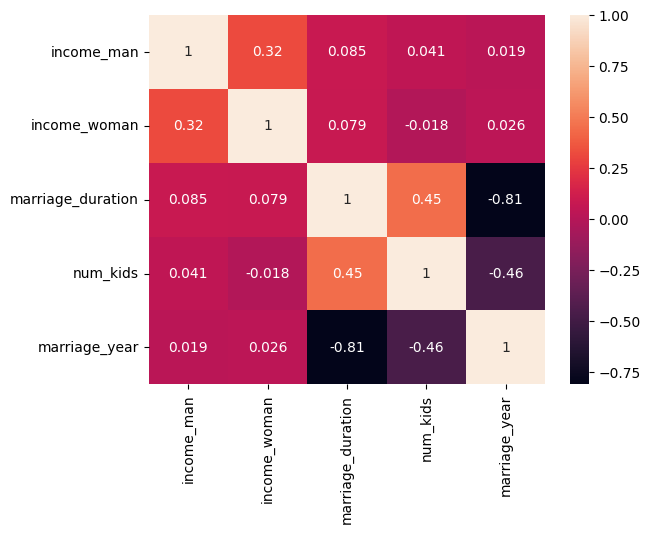

In [14]:
sns.heatmap(divorce.corr(numeric_only = True),annot=True)
plt.show()

#### For example, the monthly income of the female partner and the male partner at the time of divorce showed a correlation coefficient of 0.32 in our heatmap. Let's check that this correctly indicates a small positive relationship between the two variables by passing them as x and y arguments to Seaborn's scatterplot function. It looks like the relationship exists but is not particularly strong, just as our heatmap suggested. 

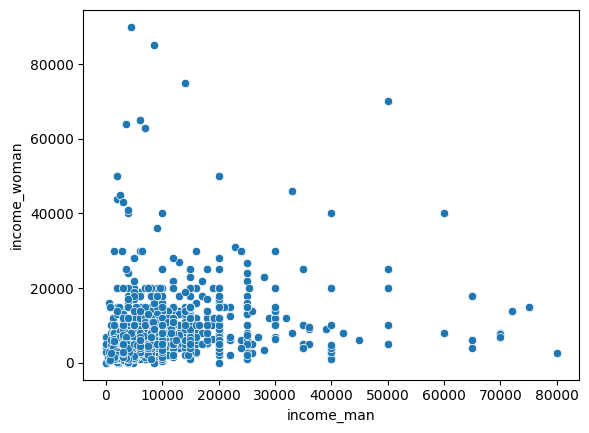

In [15]:
sns.scatterplot(data = divorce, x="income_man", y="income_woman")
plt.show()

#### We can take our scatterplots to the next level with <font color=red>Seaborn's pairplot</font>. When passed a DataFrame, pairplot plots all pairwise relationships between numerical variables in one visualization. On the diagonal from upper left to lower right, we see the distribution of each variable's observations. This is useful for a quick overview of relationships within the dataset. However, having this much information in one visual can be difficult to interpret, especially with big datasets which lead to very small plot labels like the ones we see here.


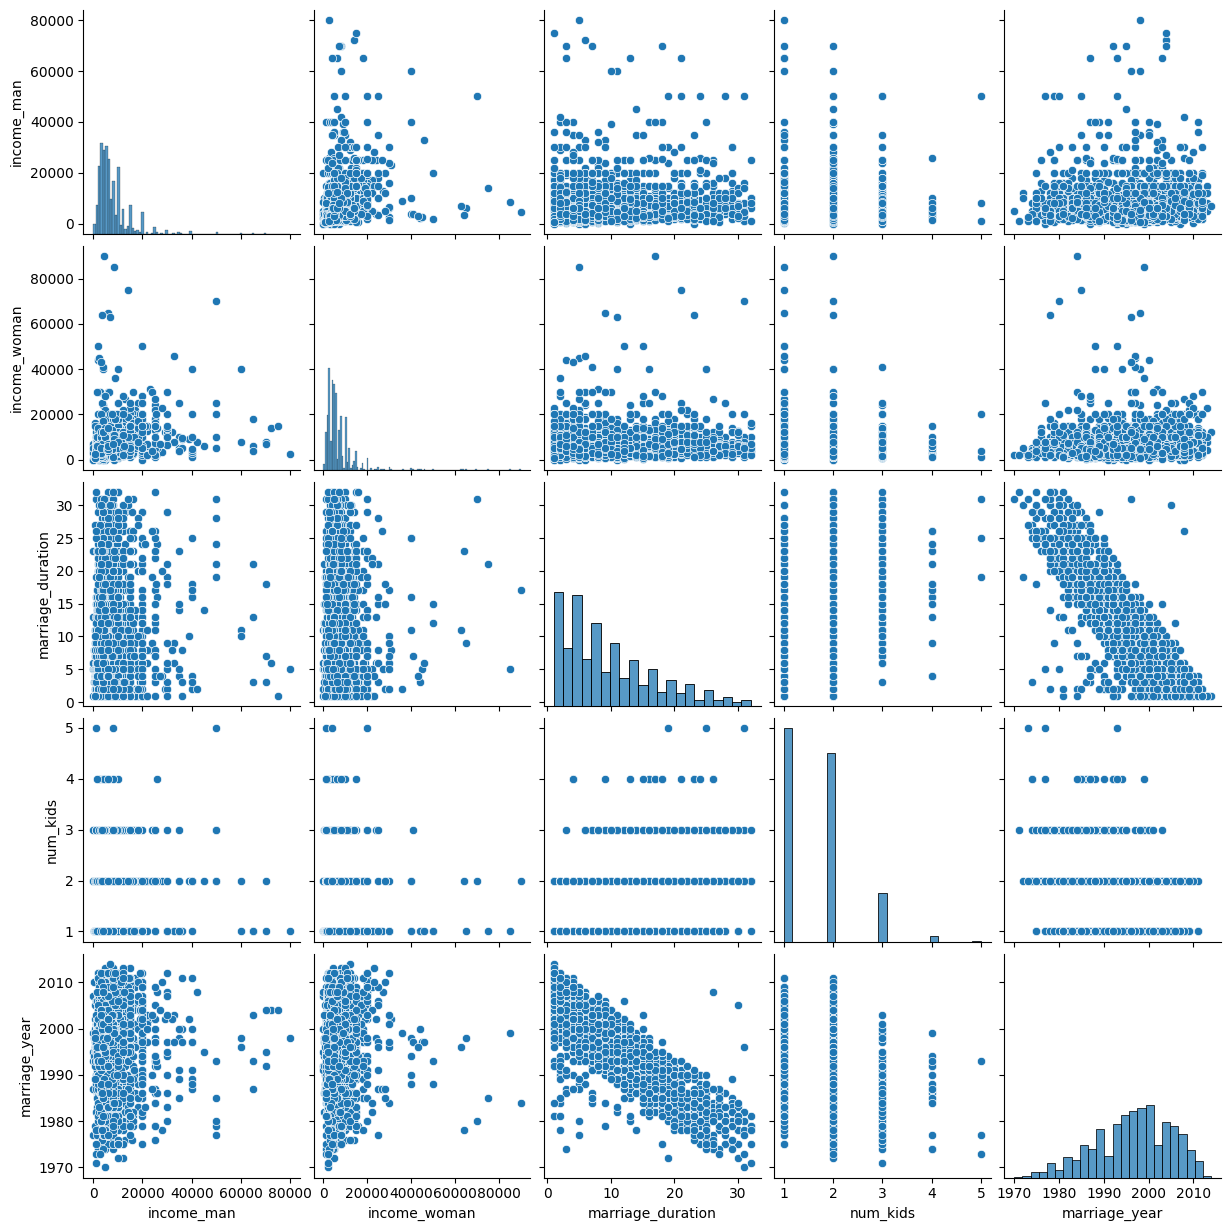

In [16]:
sns.pairplot(data=divorce)
plt.show()

#### We can <font color=red>limit the number of plotted relationships</font> by setting the <font color=red>vars argument equal to the variables of interest</font>. This visual reassures us that what our correlation coefficients told us was true: variables representing the income of each partner as well as the marriage duration variable all have fairly weak relationships with each other. We also notice in the lower right plot that the distribution of marriage durations includes many shorter marriages and fewer longer marriages.


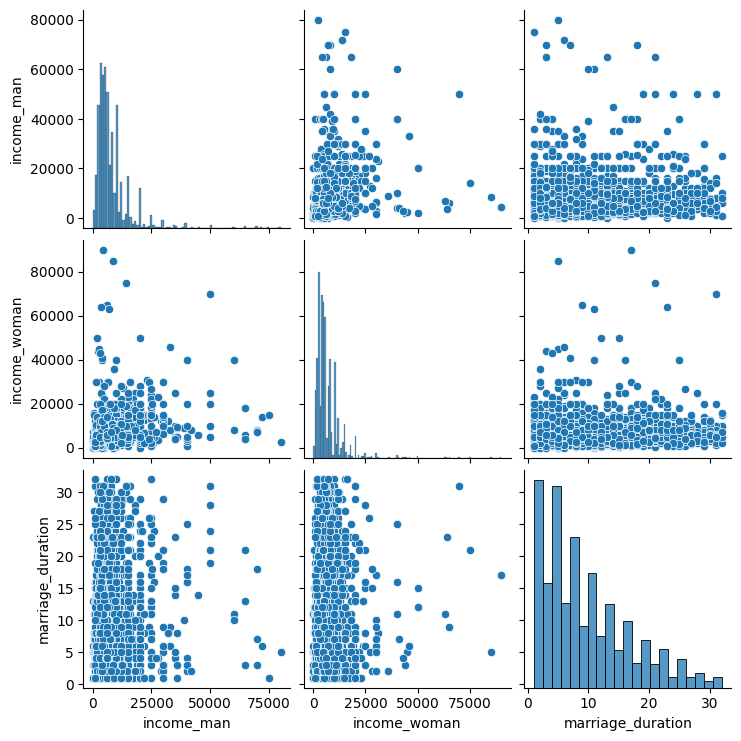

In [17]:
sns.pairplot(data=divorce, vars=["income_man","income_woman","marriage_duration"])
plt.show()

<div class="alert alert-block alert-info">
<h1>Let’s Practice</h1>
<h2>Page 15</h2>
<H4>According to the following relationships between variables in the divorce DataFrame, which is the possible correct answer?</H4>
</div>

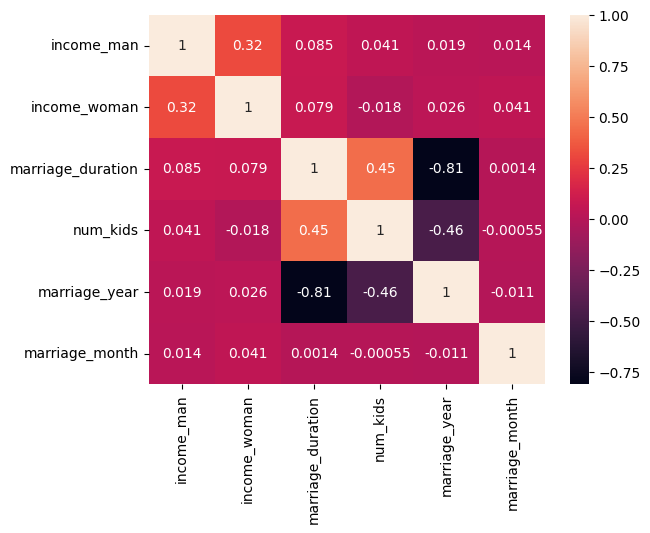

In [18]:
divorce["marriage_month"] = divorce["marriage_date"].dt.month
divorce_num = divorce[["income_man","income_woman","marriage_duration","num_kids","marriage_year","marriage_month"]]
sns.heatmap(divorce_num.corr(),annot=True)
plt.show()

- marriage_duration is strongly positively correlated with marriage_month
- The correlation between num_kids and income_man is stronger than the correlation between num_kids and marriage_duration.
- A later marriage_year causes a lower number of children, represented by num_kids.
- A later marriage_year is correlated with having fewer children. 


<div class="alert alert-block alert-info">
<H4>In the last exercise, you may have noticed that a longer marriage_duration is correlated with having more children, represented by the num_kids column. The correlation coefficient between the marriage_duration and num_kids variables is approximately 0.45.</h4>
</div>

<div class="alert alert-block alert-info">
<H3>3. Create a scatterplot showing marriage_duration on the x-axis and num_kids on the y-axis.</H3>
</div>

****There is a slight positive relationship in your scatterplot. In the dataset, couples with no children have no value in the num_kids column. If you are confident that all or most of the missing values in num_kids are related to couples without children, you could consider updating these values to 0, which might increase the correlation.


divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
marriage_year          0
marriage_month         0
dtype: int64
divorce_date           0
dob_man                0
education_man          4
income_man             0
dob_woman              0
education_woman        0
income_woman           0
marriage_date          0
marriage_duration      0
num_kids             876
marriage_year          0
marriage_month         0
num_kids_temp          0
dtype: int64


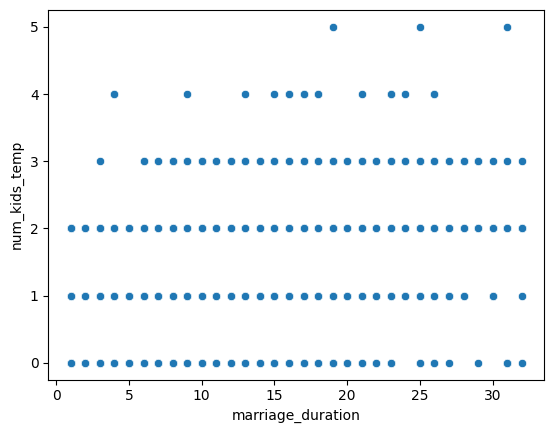

In [19]:
print(divorce.isna().sum())
divorce['num_kids_temp'] = divorce['num_kids'].fillna(0)
print(divorce.isna().sum())
sns.scatterplot(data=divorce, x='marriage_duration', y='num_kids_temp')
plt.show()

<div class="alert alert-block alert-info">
<H3>4. Create a pairplot to visualize the relationships between income_woman and marriage_duration in the divorce DataFrame. </H3>
</div>

****you can see that the relationship between income_woman and marriage_duration is not a strong one. You can also get a sense of the distributions of both variables in the upper left and lower right plots.


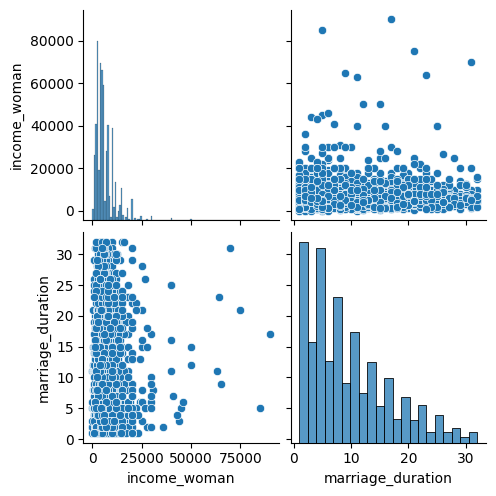

In [20]:
sns.pairplot(data=divorce, vars = ['income_woman', 'marriage_duration'])
plt.show()

# Categorial Relationships
#### We haven't explored the categorical variables related to education level yet. Let's do it! Checking the <font color=red>value_counts</font> for education_man, we see that most men have an education level between primary and professional, with a few men in the "None" or "Other" categories.


In [21]:
divorce['education_man'].value_counts()

education_man
Professional    1313
Preparatory      501
Secondary        288
Primary          100
Other              3
Name: count, dtype: int64


#### <font color=red>Categorical variables are harder to summarize numerically</font>, so <font color=blue>we often rely on visualizations to explore their relationships</font>. Perhaps we are interested in the relationship between marriage duration and the education level of the man in the dissolved marriage. We could begin by making a histogram of the distribution of marriage duration.


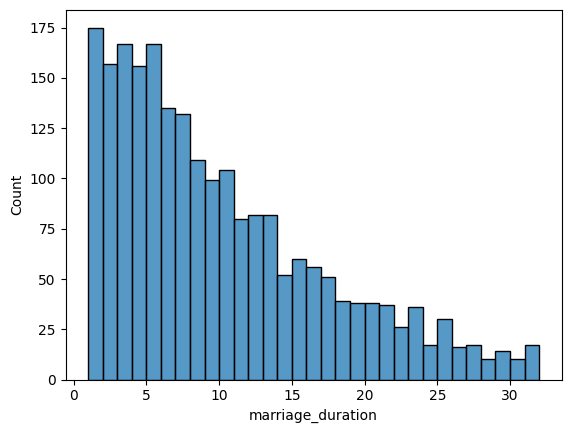

In [22]:
sns.histplot(data=divorce, x='marriage_duration', binwidth = 1)
plt.show()

#### Then layer in the information we have on male education level by setting education_man as the hue argument.


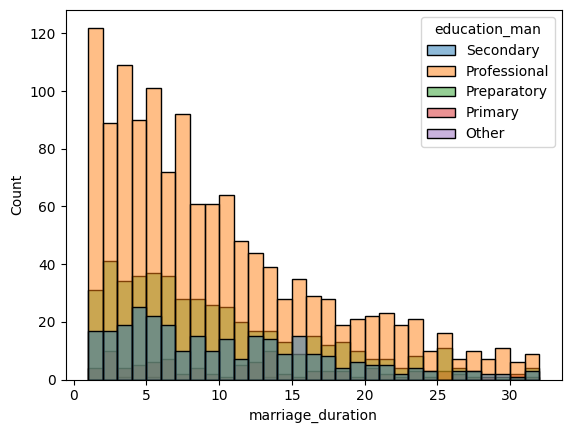

In [23]:
sns.histplot(data=divorce, x='marriage_duration', hue = 'education_man', binwidth = 1)
plt.show()

#### However, because the education levels are stacked on top of each other, the relationship between marriage duration and male education level isn't super clear.


# Seaborn KDE Plots
#### Seaborn's Kernel Density Estimate or KDE plots address the previous issue (unclear visualization due to stacking data). Similar to histograms, <font color=red>KDEs allow us to visualize distributions</font>. However, KDEs are considered more interpretable, especially when multiple distributions are shown as they are here. Notice that the location of the peak marriage duration for each level of the male partner's education is more identifiable in this KDE plot than it was in the histogram. However, due to the smoothing algorithm used in KDE plots, the curve can include values that don't make sense, so it's important to set good smoothing parameters.


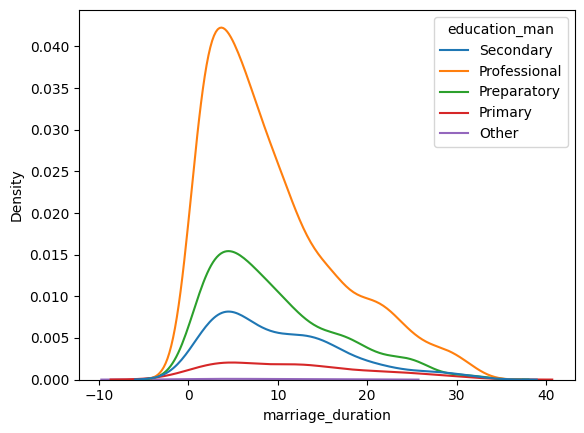

In [24]:
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'education_man')
plt.show()

#### Here's an example: zooming in on the KDE plot showing the distribution of male education levels, we can see that the distribution seems to suggest that some couples had marriage durations of less than zero. That's impossible! (Left figure)

#### To fix this, we can use the cut keyword argument. cut tells Seaborn how far past the minimum and maximum data values the curve should go when smoothing is applied. When we set cut equal to zero, the curve will be limited to values between the minimum and maximum x values, (Right figure)


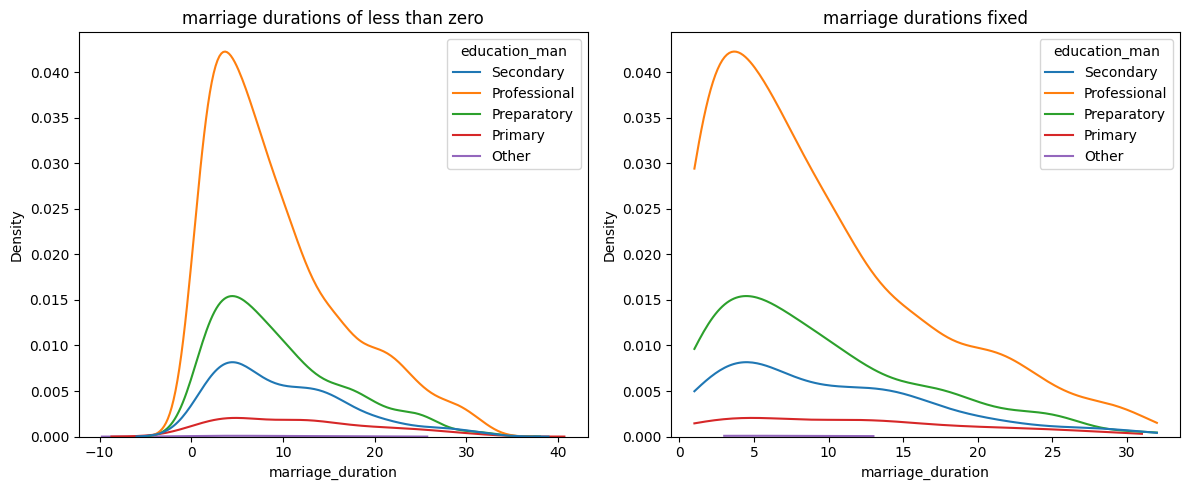

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'education_man', ax=axes[0])
axes[0].set_title("marriage durations of less than zero")
sns.kdeplot(data=divorce, x=divorce['marriage_duration'], hue = divorce['education_man'], cut = 0,  ax=axes[1])
axes[1].set_title("marriage durations fixed")
plt.tight_layout()
plt.show()


#### If we're interested in the cumulative distribution function, we can set the cumulative keyword argument to True. This graph describes the probability that marriage duration is less than or equal to the value on the x-axis for each level of male partner education.


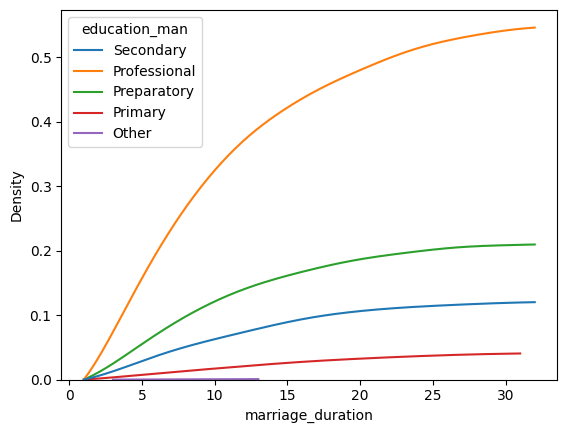

In [26]:
# Cumulative KDE Plot
sns.kdeplot(data=divorce, x=divorce['marriage_duration'], hue = divorce['education_man'], cut = 0, cumulative=True)
plt.show()

#### Perhaps we are interested in whether divorced couples who got married when they were older typically have higher levels of education. We can create columns representing the approximate age at marriage for men and women by subtracting each partner's birth year from the marriage year.


# Relationship between marriage age and education 
- Is there a relationship between age at marriage and education level?

In [27]:
divorce['man_age_marriage'] = divorce['marriage_year'] - divorce['dob_man'].dt.year
divorce['woman_age_marriage'] = divorce['marriage_year'] - divorce['dob_woman'].dt.year


#### Then, we create a scatterplot using these variables on the x and y-axis. It looks like there is a positive correlation between them! 


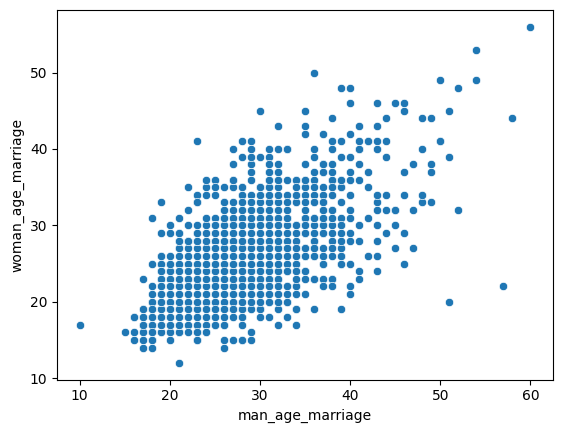

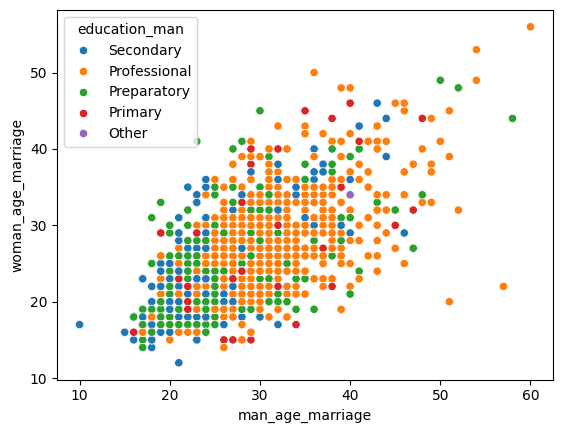

In [28]:
sns.scatterplot(data=divorce, x ='man_age_marriage', y = 'woman_age_marriage')
plt.show()
sns.scatterplot(data=divorce, x ='man_age_marriage', y = 'woman_age_marriage', hue = 'education_man')
plt.show()

#### The results suggest that men with a professional education level, represented with orange dots, may tend to get married later.


<div class="alert alert-block alert-info">
<h1>Let’s Practice</h1>
<H2>Page 25</H2>
<H4>5. Create a scatter plot that shows woman_age_marriage on the x-axis and income_woman on the y-axis; each data point should be colored based on the woman's level of education, represented by education_woman.</H4>
</div>

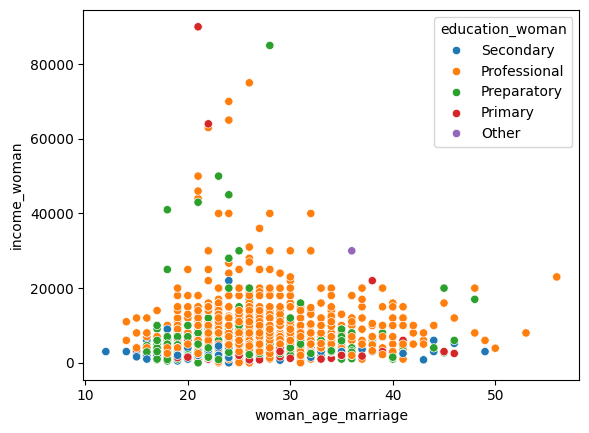

In [29]:
sns.scatterplot(data=divorce, x='woman_age_marriage', y='income_woman', hue='education_woman')
plt.show()

<div class="alert alert-block alert-warning"">
<H4>Note: From the graph, it looks like there is a positive correlation between professional education and higher salaries, as you might expect. The relationship between women's age at marriage and education level is a little less clear.</H4>
</div>

<div class="alert alert-block alert-info">
<H4>6. Create a KDE plot that shows marriage_duration on the x-axis and a different colored line for each possible number of children that a couple might have, represented by num_kids.
    Notice that the plot currently shows marriage durations less than zero; update the KDE plot so that marriage duration cannot be smoothed past the extreme data points.
     Update the code for the KDE plot from the previous step to show a cumulative distribution function for each number of children a couple has.
</H4>

</div>

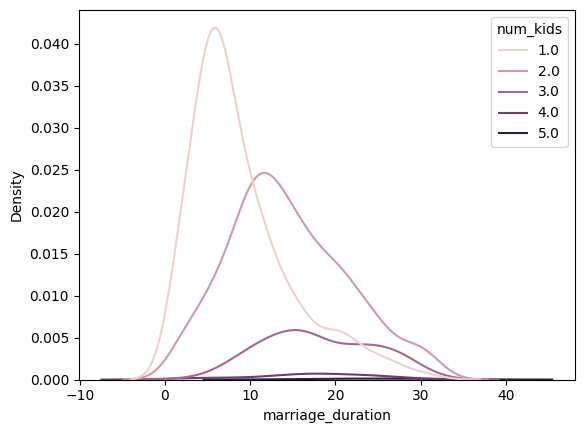

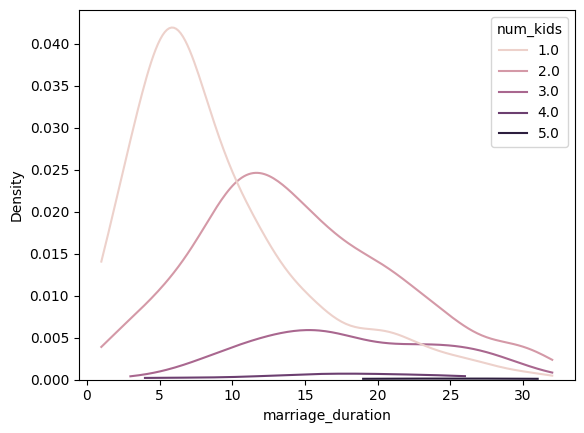

In [30]:
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'num_kids')
plt.show()
sns.kdeplot(data=divorce, x='marriage_duration', hue = 'num_kids', cut = 0)
plt.show()

<div class="alert alert-block alert-warning"">
<H4>Note: It looks as though there is a positive correlation between longer marriages and more children, but of course, this doesn't indicate causation. You can also see that there is much less data on couples with more than two children; this helps us understand how reliable our findings are. </H4>
</div>

# Considerations for Categorial Data
####  Let's see how we convert exploratory data analysis into action! We'll start by looking at class frequencies.
#### Recall that EDA is performed for a variety of reasons, like 
- detecting patterns and relationships in data, 
- generating questions or hypotheses, or 
- preparing data for machine learning models.
### Representative Data
- Sample represents the population
#### For example 
- Education versus income in USA
    - Can't use data from France 
#### With categorical data, one of the most important considerations is the <font color=red>representation of classes</font>, <font color="blue">which is another term for labels</font>. For example, say we collect data on people's attitudes to marriage. As part of our data collection, we find out their marital status, with the classes including single, married, and divorced.
### Categorial classes
- Classes = labels
- Surveys people's attributes  towards marriage
    - Martial status
        - Single
        - Married
        - Divorced
#### When we performed EDA, we realized only 50 people were married, 700 were divorced, and the remaining 250 were single. 

#### <font color=red>Do we think that this sample accurately represents the general public's opinion about marriage?</font> Are divorced people more likely to have a negative view of marriage? This is <font color=blue>an example of class imbalance</font>, where one class occurs more frequently than others. This can bias results, particularly if this class does not occur more frequently in the population.
# Class Imbalance
# SEE PPT Page 28

# Class Frequency 
#### Say that we know 40 percent of internal Indian flights go to Delhi. We can use the value_counts method again, but this time, <font color=red>set the normalize keyword argument equal to True</font>. This returns the relative frequencies for each class, showing that Delhi only represents 11.82 percent of destinations in our dataset. <font color=blue>Again, this could suggest that our data is not representative of the population - in this case, internal flights in India</font>.


In [31]:
planes = pd.read_csv("Airlines_unclean.csv", index_col=0)

In [32]:
planes["Destination"].value_counts()

Destination
Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: count, dtype: int64

### Relative Class Frequency
- 40% of internal India flights have a  destination of Delhi


In [33]:
planes["Destination"].value_counts(normalize=True)

Destination
Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: proportion, dtype: float64

- is our sample  representative of the population ( India Internal Flights ) ?

### Checking Class Frequency with Cross-tabulation
#### Another method for looking at class frequency is cross-tabulation, which enables us to examine the frequency of combinations of classes. Let's look at flight route frequencies. We'll start by calling <font color=red>pd.crosstab() </font> function.

In [34]:
pd.crosstab(planes["Source"],planes["Destination"])

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,0,0,1199,0,0,868
Chennai,0,0,0,0,364,0
Delhi,0,4318,0,0,0,0
Kolkata,2720,0,0,0,0,0
Mumbai,0,0,0,662,0,0


- We see the most popular route is from Delhi to Cochin, making up 4318 flights

#### <font color=red>Say we know the median price for all internal flight routes in India</font>. Here they are for the routes in our dataset, measured in Indian Rupees. We can calculate the median price for these routes in our DataFrame, and compare the difference to these expected values.


In [35]:
planes.groupby(['Source','Destination']).median(numeric_only = True)

Price
Source   Destination         
Banglore Delhi         4823.0
         New Delhi    10976.5
Chennai  Kolkata       3850.0
Delhi    Cochin       10262.0
Kolkata  Banglore      9345.0
Mumbai   Hyderabad     3342.0

#### We do this by adding two keyword arguments to pd.crosstab(). We pass the Price column to the values= argument, and use aggfunc() to select what aggregated calculation we want to perform. We can pass a summary statistic as a string, in this case, setting it equal to the median. The results show median values for all possible routes in the dataset.


### Aggregated values with pd.crosstab()

In [36]:
pd.crosstab(planes['Source'], planes['Destination'], values=planes['Price'], aggfunc = 'median')

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Source,,,,,,
Banglore,NaN,NaN,4823.0,NaN,NaN,10976.5
Chennai,NaN,NaN,NaN,NaN,3850.0,NaN
Delhi,NaN,10262.0,NaN,NaN,NaN,NaN
Kolkata,9345.0,NaN,NaN,NaN,NaN,NaN
Mumbai,NaN,NaN,NaN,3342.0,NaN,NaN


### Comparing sample to population

In [37]:
planes.groupby(['Source','Destination']).median(numeric_only = True)

Price
Source   Destination         
Banglore Delhi         4823.0
         New Delhi    10976.5
Chennai  Kolkata       3850.0
Delhi    Cochin       10262.0
Kolkata  Banglore      9345.0
Mumbai   Hyderabad     3342.0

<div class="alert alert-block alert-danger">
<font color=red>Comparing our prices with the expected values, most are similar. However, routes from Banglore to Delhi and New Delhi are significantly different (more expensive and less expensive) in the dataset, suggesting they aren't representative of the population.</font>
</div>

### Also try 
#### planes.groupby(['Source','Destination']).median(numeric_only = True)

<div class="alert alert-block alert-info">
<H1>Let’s Practice</H1>
<H2>Page 34</H2>
<H2>Checking for class imbalance</H2>
<H3>The 2022 Kaggle Survey captures information about data scientists' backgrounds, preferred technologies, and techniques. It is seen as an accurate view of what is happening in data science based on the volume and profile of responders.
Having looked at the job titles and categorized to align with our salaries DataFrame, you can see the following proportion of job categories in the Kaggle survey:</H3>
- Load Salary_Rupee_USD.csv to salaries with index_col = 0
</div>

In [38]:
salaries = pd.read_csv('Salary_Rupee_USD.csv', index_col = 0)
print(salaries.info())

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          407 non-null    int64  
 1   Designation           407 non-null    object 
 2   Experience            407 non-null    object 
 3   Employment_Status     407 non-null    object 
 4   Salary_In_Rupees      407 non-null    float64
 5   Employee_Location     407 non-null    object 
 6   Company_Location      407 non-null    object 
 7   Company_Size          407 non-null    object 
 8   Remote_Working_Ratio  407 non-null    int64  
 9   Salary_USD            407 non-null    float64
 10  Job_Category          407 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 38.2+ KB
None


<div class="alert alert-block alert-info">
<H4>7. Print the relative frequency of the "Job_Category" column from salaries DataFrame.</h4>

</div>



In [39]:
print(salaries['Job_Category'].value_counts(normalize = True))

Job_Category
Data Science        0.277641
Data Engineering    0.272727
Data Analytics      0.226044
Machine Learning    0.120393
Other               0.068796
Managerial          0.034398
Name: proportion, dtype: float64


<div class="alert alert-block alert-warning"">
Note: It looks like Data Science is the most popular class and has a similar representation. Still, the other categories have quite different relative frequencies, which might not be surprising given the target audience is data scientists! Given the difference in relative frequencies, can you trust the salaries DataFrame to accurately represent Managerial roles?
</div>

<div class="alert alert-block alert-info">
<H1>Let’s Practice</H1>
<H2>Page 35</H2>
<H2>Cross-tabulation</H2>

<H4> Cross-tabulation can help identify how observations occur in combination.
Using the salaries dataset, you'll perform cross-tabulation on multiple variables, including the use of aggregation, to see the relationship between "Company_Size" and other variables. </H4>
<H4>
8. Perform cross-tabulation, setting "Company_Size" as the index, and the columns to classes in "Experience".  </H4>
<H4> - Perform cross-tabulate "Job_Category" and classes of "Company_Size" as column names.</H4>
<H4> - Update pd.crosstab() to return the mean "Salary_USD" values.</H4>

</div>

In [40]:
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    EN  EX  MI   SE
Company_Size                 
L             24   7  49   44
M             25   9  58  136
S             18   1  21   15


In [41]:
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size       L   M   S
Job_Category                
Data Analytics    23  61   8
Data Engineering  28  72  11
Data Science      38  59  16
Machine Learning  17  19  13
Managerial         5   8   1
Other             13   9   6


In [42]:
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Company_Size                  L              M             S
Job_Category                                                
Data Analytics    112851.749217   95912.685246  53741.877000
Data Engineering  118939.035000  121287.060500  86927.136000
Data Science       96489.520105  116044.455864  62241.749250
Machine Learning  140779.491529  100794.236842  78812.586462
Managerial        190551.448800  150713.628000  31484.700000
Other              92873.911385   89750.578667  69871.248000


<div class="alert alert-block alert-warning"">
Note: Looks like the largest mean salary is for Managerial data roles in large companies!
</div>

# Generating New Features
#### Sometimes the format of our data can limit our ability to detect relationships or inhibit the potential performance of machine learning models. One method to overcome these issues is to generate new features from our data!

#### Checking correlation with a heatmap, we see a moderate positive correlation between Price and Duration, but it looks like those are the only numeric variables in our dataset.


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                  float64
Total_Stops                object
Additional_Info            object
Price                     float64
dtype: object


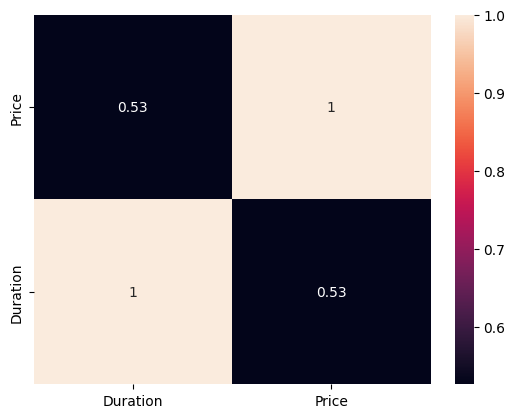

In [43]:
planes = pd.read_csv('Airlines_unclean.csv', index_col = 0, parse_dates=['Date_of_Journey','Dep_Time','Arrival_Time'],date_format = "%d/%m/%Y")
# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", ".")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", "")
# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)
print(planes.dtypes)
ax = sns.heatmap(planes.corr(numeric_only = True), annot=True)
ax.set_ylim([0,2])
plt.show()

In [44]:
#remove Nan values
threshold = len(planes) * 0.05
print(threshold)
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

#planes = planes.drop(columns = ['Additional_Info'])

# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()
print(airline_prices)
print('============================================')

# Convert to a dictionary
prices_dict = airline_prices.to_dict()
print(prices_dict)
print('============================================')

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

533.0
Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64
Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64
{'Air Asia': 5192.0, 'Air India': 9443.0, 'GoAir': 5003.5, 'IndiGo': 5054.0, 'Jet Airways': 11507.0, 'Multiple carriers': 10197.0, 'SpiceJet': 3873.0, 'Vistara': 8028.0}
Airline              0
D

### Total Stops
#### Viewing the data types confirms this is the case. However, Total_Stops should also be numeric. Viewing the value_counts, we see need to remove string characters.

In [45]:
planes["Total_Stops"].value_counts()

Total_Stops
1 stop      4467
non-stop    2786
2 stops     1219
3 stops       35
4 stops        1
Name: count, dtype: int64

#### We use the <font color=red>str.replace()</font> method to first remove " stops", including the space, so that flights with two, three, or four stops are ready to convert. Next, we clean flights with one stop. Lastly, we change "non-stop" to "0", then set the data type to integer.
### Cleaning Total Stop

In [46]:
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stops', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' stop', '')
planes['Total_Stops'] = planes['Total_Stops'].str.replace('non-stop', '0')
planes['Total_Stops'] = planes['Total_Stops'].str.replace(' ', '')
planes['Total_Stops'] = planes['Total_Stops'].astype(int)
print(planes['Total_Stops'].head())
print(planes.dtypes)

0    2
1    1
2    1
3    0
4    1
Name: Total_Stops, dtype: int64
Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                  float64
Total_Stops                 int64
Additional_Info            object
Price                     float64
dtype: object


In [47]:
planes["Total_Stops"].value_counts()

Total_Stops
1    4467
0    2786
2    1219
3      35
4       1
Name: count, dtype: int64

### Correlation Total Stop

<Axes: >

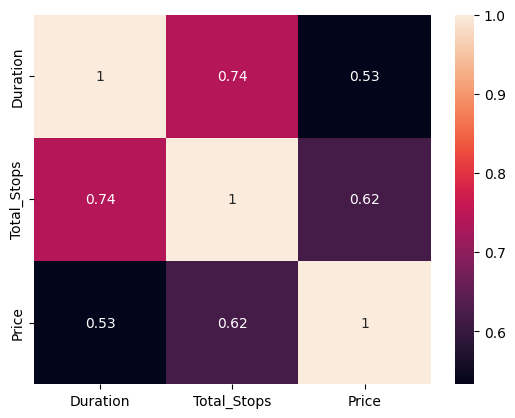

In [48]:
sns.heatmap(planes[["Duration","Total_Stops","Price"]].corr() ,annot=True)

#### Unsurprisingly, Total_Stops is strongly correlated with Duration. What is interesting is that Total_Stops and Price are more strongly correlated than Duration is with Price! Let's see what else we can find out!

#### Rechecking our data types, notice that there are three datetime variables - Date_of_Journey, Dep_Time, and Arrival_Time.

#### Don’t forget numeric_only = True argument.


### Extracting Months and Weekdays
#### We know how to extract attributes from datetime values, so we can see if these offer any insights into pricing. To start, let's look at Date_of_Journey. If we think prices vary per month, it's worth using this attribute - we create it as a column in our DataFrame. 

#### Perhaps prices might also differ depending on the day of the week? Let's grab that using the dt.weekday attribute. It returns values of zero, representing Monday, through to seven, for Sunday. 

#### Previewing these columns we see the first flight, departing on the 6th September, was a Friday, indicated by a four.

In [49]:
planes['month'] = planes['Date_of_Journey'].dt.month
planes['weekday'] = planes['Date_of_Journey'].dt.weekday
planes['Dep_Time'] = pd.to_datetime(planes['Dep_Time'], format='mixed')
planes['Arrival_Time'] = pd.to_datetime(planes['Arrival_Time'], format='mixed')
print(planes.dtypes)
print(planes[['month', 'weekday', 'Date_of_Journey']].head())

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                  float64
Total_Stops                 int64
Additional_Info            object
Price                     float64
month                       int32
weekday                     int32
dtype: object
   month  weekday Date_of_Journey
0      6        6      2019-06-09
1      5        6      2019-05-12
2      3        4      2019-03-01
3      6        0      2019-06-24
4      3        1      2019-03-12


#### We might wonder if people tend to pay more to depart or arrive at more convenient times. We extract the hour of departure and arrival from those respective columns too.


In [50]:
planes['Dep_Hour'] = planes['Dep_Time'].dt.hour
planes['Arrival_Hour'] = planes['Arrival_Time'].dt.hour

#### Because they are numeric, we can calculate correlation between these new datetime features and other variables. Re-plotting our heatmap, unfortunately there aren't any new strong relationships.<Font color=red> But we wouldn't have known this if we hadn't generated these features</font>.


In [51]:
planes.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                  float64
Total_Stops                 int64
Additional_Info            object
Price                     float64
month                       int32
weekday                     int32
Dep_Hour                    int32
Arrival_Hour                int32
dtype: object

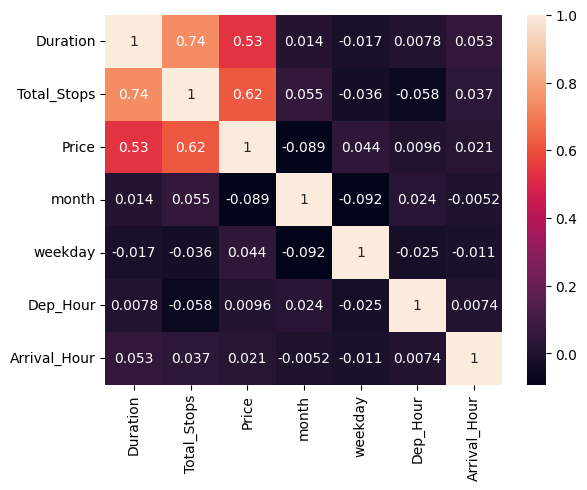

In [52]:
sns.heatmap(planes.corr(numeric_only = True), annot = True)
plt.show()

Note: If the data type of ’Dep_Time’ and ‘Arrival_Time’ is not DateTime format, you must change their data type to DateTime format.’
For instance, planes['Dep_Time'] = pd.to_datetime(planes['Dep_Time'], format='mixed')

### Another Technique to Generate New Features
#### There’s another technique we can use to generate new features. We can group numeric data and label them as classes. For example, we don't have a column for ticket type. We could use descriptive statistics to label flights as economy, premium economy, business class, or first class, based on prices within specific ranges, or bins.
### Creating Categories

In [53]:
planes["Price"].describe()

count     8508.000000
mean      9033.468441
std       4366.382574
min       1759.000000
25%       5228.000000
50%       8452.000000
75%      12242.000000
max      54826.000000
Name: Price, dtype: float64

<table>
    <tr><th>Range</th><th>Ticket Type</th></tr>
    <tr><td>< 5228</td><td>Economy</td></tr>
    <tr><td>> 5228 and <= 8355</td><td>Premium Economic</td></tr>
    <tr><td>> 8355 and <= 12373</td><td>Business Class</td></tr>
    <tr><td>> 12373</td><td>First Class</td></tr>
</table>
We'll split equally across the price range using quartiles. We first store the 25th percentile using the quantile method. We get the 50th percentile by calling the median. Next we get the 75th percentile, and lastly, we store the maximum value.


### Descriptive statistics

In [54]:
twenty_fifth = planes['Price'].quantile(0.25)
median = planes['Price'].median()
seventy_fifth = planes['Price'].quantile(0.75)
maximum = planes['Price'].max()

#### Then create labels. Next, we create the bins, a list starting from zero and including our descriptive statistic variables.
### Labels and bins

In [55]:
labels = ['Economy','Premium Economy','Business Class','First Class']
bins = [0, twenty_fifth, median, seventy_fifth, maximum]


## Page 46
### pd.cut()

In [56]:
planes['Price_Category'] = pd.cut(planes['Price'], labels=labels,bins=bins)


Then preview the price categories.

In [57]:
print(planes[['Price', 'Price_Category']].head())

     Price   Price_Category
0  13882.0      First Class
1   6218.0  Premium Economy
2  13302.0      First Class
3   3873.0          Economy
4  11087.0   Business Class


### Price Category by airline

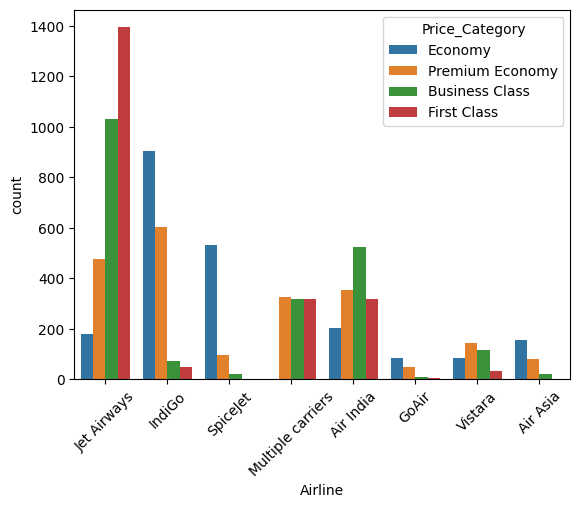

In [58]:
sns.countplot(data=planes, x='Airline', hue='Price_Category')
plt.xticks(rotation = 45)
plt.show()

#### It looks like Jet Airways has the largest number of "First Class" tickets, while most of IndiGo and SpiceJet's flights are "Economy."


<div class="alert alert-block alert-info">
<h1>Let’s Practice</h1>
<h2> Page  48 </h2>
<h4> Load the Salaries_with_date_of_response.csv to salaries, with index_col = 0 and parse_date = [‘date_of_response’]</h4>
</div>


In [59]:
salaries = pd.read_csv('Salaries_with_date_of_response.csv', index_col = 0, parse_dates=['date_of_response'],date_format = "%d/%m/%Y")

<div class="alert alert-block alert-info">
<h4>
Your task is to extract datetime attributes from this column and then create a heat map to visualize the correlation coefficients between variables.
</H4>

In [60]:
print(salaries.dtypes)
print(salaries.head())

Designation                     object
date_of_response        datetime64[ns]
Experience                      object
Employment_Status               object
Salary_In_Rupees               float64
Employee_Location               object
Company_Location                object
Company_Size                    object
Remote_Working_Ratio             int64
Salary_USD                     float64
Job_Category                    object
dtype: object
                  Designation date_of_response Experience Employment_Status  \
0  Machine Learning Scientist       2020-01-07         SE                FT   
1           Big Data Engineer       2020-09-19         SE                FT   
2        Product Data Analyst       2020-11-21         MI                FT   
3   Machine Learning Engineer       2020-11-29         SE                FT   
4                Data Analyst       2020-09-07         EN                FT   

   Salary_In_Rupees Employee_Location Company_Location Company_Size  \
0        20

<div class="alert alert-block alert-info">
<h4>9. Extract the month from "date_of_response", storing it as a column called "month".</H4>
</div>

In [61]:
# Get the month of the response
salaries["month"] = salaries["date_of_response"].dt.month


<div class="alert alert-block alert-info">
<h4>Create the "weekday" column, containing the weekday that the participants completed the survey.</H4>
</div>

In [62]:
# Extract the weekday of the response
salaries["weekday"] = salaries["date_of_response"].dt.weekday

<div class="alert alert-block alert-info">
<h4>Plot a heat map, including the Pearson correlation coefficient scores.</H4>
</div>

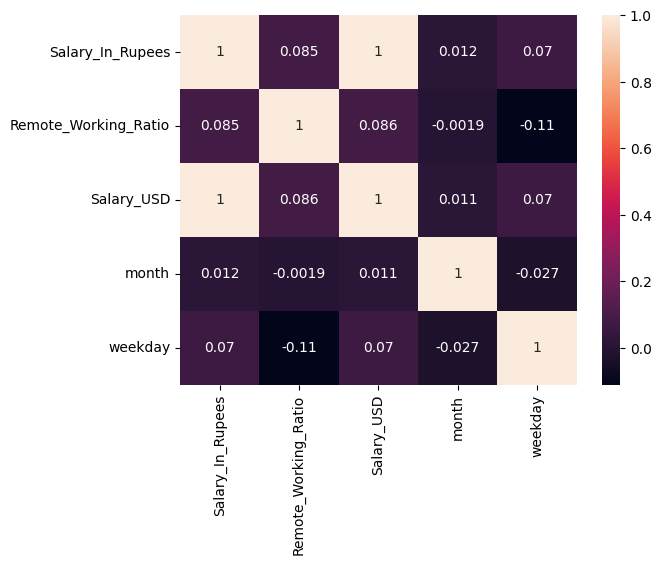

In [63]:
# Create a heatmap
sns.heatmap(salaries.corr(numeric_only = True), annot=True)
plt.show()

#### Your next task is to convert the "Salary_USD" column into categories based on its percentiles. First, you need to find the percentiles and store them as variables.  (See next slide)


<div class="alert alert-block alert-info">
<h2> Page  49 </h2>
<h4> <ul>
<li>Find the 25th percentile of "Salary_USD".</li> 
<li>Store the median of "Salary_USD" as salaries_median.</li>
<li>Get the 75th percentile of salaries.</li>
</ul></h4>
</div>


In [64]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = seventy_fifth = salaries["Salary_USD"].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

60880.691999999995 97488.552 143225.1


<div class="alert alert-block alert-info">
<h4> <ul>
<li>Create salary_labels, a list containing "entry", "mid", "senior", and "exec".</li>
<li>Finish salary_ranges, adding the 25th percentile, median, 75th percentile, and largest value from "Salary_USD"</li>
<li>Split "Salary_USD" based on the labels and ranges you've created.</li>
<li>Use sns.countplot() to visualize the count of "Company_Size", factoring salary level labels.</li>
</ul></h4>
</div>

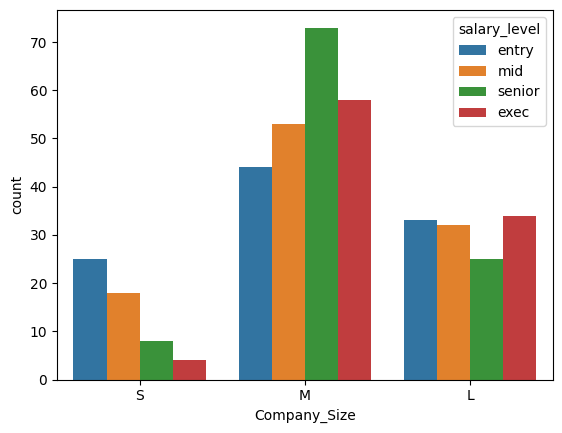

In [65]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

<div class="alert alert-block alert-info">
<h2> Page  50 </h2>
<h4> 11. Regarding comparing salaries, exploratory data analysis is a crucial step in generating hypotheses! You've had an idea you'd like to explore—do data professionals get paid more in the USA than they do in Great Britain? You'll need to subset the data by "Employee_Location" and produce a plot displaying the average salary between the two groups.</h4>
</div>
    

<div class="alert alert-block alert-info">
<h4>Filter salaries where "Employee_Location" is "US" or "GB", saving as usa_and_gb.</H4>
</div>

In [66]:
# Filter for employees in the US or GB


<div class="alert alert-block alert-info">
<h4> Use usa_and_gb to create a barplot visualizing  "Salary_USD" against "Employee_Location".</h4>
</div>

In [67]:
# Create a barplot of salaries by location


<div class="alert alert-block alert-info">
<h4>Create a bar plot of salary versus company size, factoring in employment status (hue)</h4>
</div>

In [68]:
# Create a bar plot of salary versus company size, factoring in employment status


# Notes to Take
## How can correlation help your business?
#### Correlation is widely used in real-life decision-making. You will find correlations in Marketing, Finance, and Sales. Basically, we could mention domains endlessly.
## A few benefits:
### Pattern recognition. 
#### Looking at millions of rows of raw data in the big data world will not tell you anything about the business. Using existing information for better decision-making will be crucial in the future. It can reveal new business opportunities, give insights about existing processes, and help to communicate clearly. Recognizing patterns is one of data science’s main goals, and correlation analysis can help with that.

### Financial decision making
#### investment decisions. Diversifying is essential. Investing in negatively correlated sectors can help you mitigate risk. 
#### For example: if the airline industry is negatively correlated with the social media industry, the investor may choose to invest in a social media stock. If a negative event affects one of those industries, the other sector will be a safer place for the money [11]

### Projections. 
#### If a company finds a positive correlation between two variables and has some predictions on the one variable involved in the correlation, it can also try to make predictions on the second variable.

#### For example, Company X finds a positive correlation between the number of tourists in City Y and its sales. A 10% rise in visitors for the coming year is predicted in city Y. Company X can also anticipate an increase in sales. Of course, one should always consider the above-mentioned correlation-causation issue when it comes to predictions.
